In [ ]:
import numpy as np
import cv2
from tensorflow.keras import layers, models

In [ ]:
from math import sqrt, pow

def cosine_similarity(vector1: list[float], vector2: list[float]) -> float:
    """Returns the cosine of the angle between two vectors."""
    # the cosine similarity between two vectors is the dot product of the two vectors divided by the magnitude of each vector

    dot_product = 0
    magnitude_vector1 = 0
    magnitude_vector2 = 0

    vector1_length = len(vector1)
    vector2_length = len(vector2)

    if vector1_length > vector2_length:
        # fill vector2 with 0s until it is the same length as vector1 (required for dot product)
        vector2 = vector2 + [0] * (vector1_length - vector2_length)
    elif vector2_length > vector1_length:
        # fill vector1 with 0s until it is the same length as vector2 (required for dot product)
        vector1 = vector1 + [0] * (vector2_length - vector1_length)

    # dot product calculation
    for i in range(len(vector1)):
        dot_product += vector1[i] * vector2[i]

    # vector1 magnitude calculation
    for i in range(len(vector1)):
        magnitude_vector1 += pow(vector1[i], 2)

    # vector2 magnitude calculation
    for i in range(len(vector2)):
        magnitude_vector2 += pow(vector2[i], 2)

    # final magnitude calculation
    magnitude = sqrt(magnitude_vector1) * sqrt(magnitude_vector2)

    # return cosine similarity
    return dot_product / magnitude

In [ ]:
#image embedding
def create_cnn_model(input_shape, embedding_size):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((4, 4)),
        layers.Flatten(),
        layers.Dense(embedding_size, activation='relu')
    ])
    return model

In [ ]:
def generate_image_embedding(image):
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    embedding = model.predict(image)
    return embedding.flatten()

In [ ]:
def load_and_resize_image(image_path, target_size=(28, 28)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    else:
        image = cv2.resize(image, target_size,cv2.INTER_AREA)
        return image


In [ ]:
# input_shape = (28, 28, 1)
# embedding_size = 32
# cnn_model = create_cnn_model(input_shape, embedding_size)
# cnn_model.save("/content/drive/MyDrive/cnn_model.h5")

In [ ]:
model = models.load_model("/content/drive/MyDrive/cnn_model.h5")

In [ ]:
# import glob
# data_dir = '/content/drive/MyDrive/datasets gerdoo'

# list_imgs = glob.glob(data_dir + "/**/**.jpg")
# print(f"There are {len(list_imgs)} images in the dataset {data_dir}")


There are 11094 images in the dataset /content/drive/MyDrive/datasets gerdoo


In [ ]:
from numpy import asarray
from numpy import save
import os
data=[]
for image in list_imgs:
       example_image = load_and_resize_image(image)
       if example_image is None:
          continue
       image_embedding = generate_image_embedding(example_image)
       path = os.path.normpath(image).split(os.path.sep)
       new_path = os.path.join(*path[-2:])
       data.append({'name': new_path, 'embedding': image_embedding})
       # save to npy file
save('/content/drive/MyDrive/imagesembedding128.csv', data)

In [ ]:
from numpy import load
data = load('/content/drive/MyDrive/imagesembedding128.csv.npy',allow_pickle=True)
d = dict(enumerate(data.flatten(), 1))

In [ ]:
img_path = '/content/drive/MyDrive/datasets gerdoo/امیرمهدی ژوله بازیگر/Amir Mahdi Jule2.jpg'
example_image = load_and_resize_image(img_path)
image_embedding = generate_image_embedding(example_image)
content = str(image_embedding)

print("Image embedding shape:", image_embedding.shape)
print("Image embedding:", image_embedding)

1/1 [==============================] - 0s 24ms/step
Image embedding shape: (32,)
Image embedding: [0.05167759 0.         0.         0.         0.04244915 0.06088534
 0.04051067 0.02891264 0.09614279 0.00626456 0.         0.09326819
 0.         0.         0.         0.         0.01238348 0.
 0.         0.09974445 0.12415795 0.00764761 0.07833091 0.
 0.07484297 0.         0.         0.         0.06311143 0.
 0.         0.        ]


In [ ]:
k_top=[]
name_top=[]
top=0
for i in range(len(d)):
     similarity = cosine_similarity(image_embedding, data[i]['embedding'])
     if top<similarity:
       top=similarity
       k_top.append(similarity)
       name_top.append(data[i]['name'])
     else:
      continue

In [ ]:
import cv2
from matplotlib import pyplot as plt

0.9535644708883282   مازیار فلاحی بازیگر/images15.jpg
0.9999999929308331   امیرمهدی ژوله بازیگر/Amir Mahdi Jule2.jpg
0.9912133895883702   مهتاب کرامتی بازیگر/images37.jpg
0.9902844741721241   مجید واشقانی بازیگر/images49.jpg
0.987915511584092   مانی کسرائیان بازیگر/images51.jpg


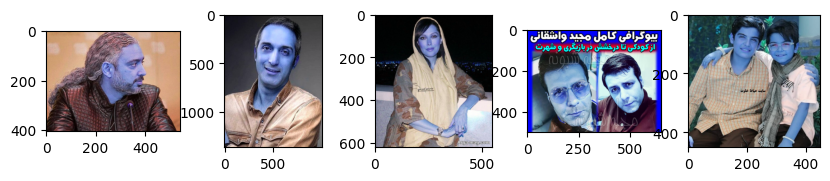

In [ ]:
for i in range(0,5):
  print(k_top[-i]," ",name_top[-i])

plt.figure(figsize=(10,10)) # specifying the overall grid size
for i in range(5):
   plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
   f=cv2.imread('/content/drive/MyDrive/datasets gerdoo/'+name_top[-i])
   plt.imshow(f)
plt.show()


**autoencoder**

In [34]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(128, 128, 1))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(1, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [35]:
encoder = keras.Model(input_img, encoded)

In [41]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(128, 128, 1))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [37]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:
import numpy as np

In [ ]:
from numpy import load
images = load('/content/drive/MyDrive/imagesembedding128500.csv.npy',allow_pickle=True)
images

In [17]:
# Convert the data type to float32 array so that it is easy to perform operations on it.
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr.shape

(500, 128, 128, 3)

In [18]:
images_arr = images_arr.reshape(-1, 128,128, 1)
images_arr.shape

(1500, 128, 128, 1)

In [19]:
print('Max value ',np.max(images_arr))
print('Min value ',np.min(images_arr))

Max value  255.0
Min value  0.0


In [20]:
images_arr = images_arr / np.max(images_arr)
images_arr.shape

(1500, 128, 128, 1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_X, valid_X, train_ground, valid_ground = train_test_split(images_arr,images_arr,test_size=0.2,random_state=44)

In [23]:
print('shape of train_X        :' , train_X.shape)
print('shape of valid_X        :' , valid_X.shape)
print('shape of train_ground   :' , train_ground.shape)
print('shape of valid_ground   :' , valid_ground.shape)

shape of train_X        : (1200, 128, 128, 1)
shape of valid_X        : (300, 128, 128, 1)
shape of train_ground   : (1200, 128, 128, 1)
shape of valid_ground   : (300, 128, 128, 1)


In [39]:
autoencoder.fit(train_X, train_X,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(valid_X, valid_X))

Epoch 1/50
19/19 [==============================] - 27s 1s/step - loss: 0.7041 - val_loss: 0.6985
Epoch 2/50
19/19 [==============================] - 11s 605ms/step - loss: 0.6908 - val_loss: 0.6852
Epoch 3/50
19/19 [==============================] - 11s 603ms/step - loss: 0.6783 - val_loss: 0.6727
Epoch 4/50
19/19 [==============================] - 11s 600ms/step - loss: 0.6663 - val_loss: 0.6604
Epoch 5/50
19/19 [==============================] - 10s 515ms/step - loss: 0.6546 - val_loss: 0.6483
Epoch 6/50
19/19 [==============================] - 11s 602ms/step - loss: 0.6429 - val_loss: 0.6363
Epoch 7/50
19/19 [==============================] - 11s 597ms/step - loss: 0.6313 - val_loss: 0.6242
Epoch 8/50
19/19 [==============================] - 11s 576ms/step - loss: 0.6196 - val_loss: 0.6122
Epoch 9/50
19/19 [==============================] - 10s 505ms/step - loss: 0.6079 - val_loss: 0.6002
Epoch 10/50
19/19 [==============================] - 11s 593ms/step - loss: 0.5962 - val_loss:

In [42]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(valid_X)
decoded_imgs = decoder.predict(encoded_imgs)

10/10 [==============================] - 1s 44ms/step


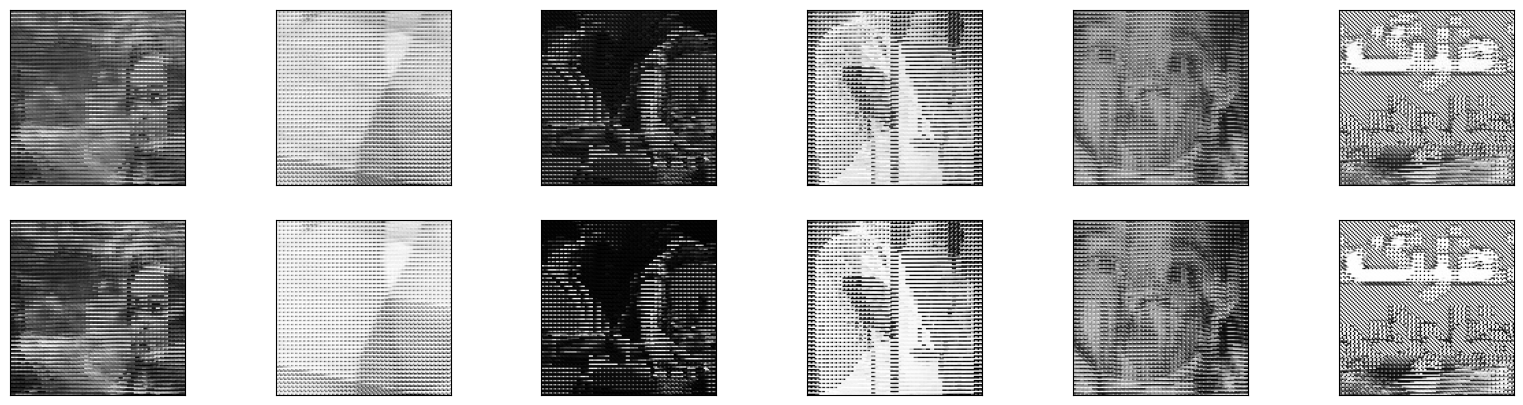

In [47]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 6  # How many digits we will display
plt.figure(figsize=(20, 5))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(valid_X[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()